In [2]:
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
import glob

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
# df['xmax'] = (df['xmax']*2)
# df['xmin'] = (df['xmin']*2)
# df['ymax'] = (df['ymax']*2)
# df['ymin'] = (df['ymin']*2)

In [ ]:
df['xmax'] = abs(df['xmax']*2)
df['xmin'] = abs(df['xmin']*2)
df['ymax'] = abs(df['ymax']*2)
df['ymin'] = abs(df['ymin']*2)

In [ ]:
df.groupby(['name']).size()

name
BAD_BILLBOARD        1555
BAD_STREETLIGHT         1
BROKEN_SIGNAGE         83
CLUTTER_SIDEWALK     2253
CONSTRUCTION_ROAD    2730
FADED_SIGNAGE         107
GARBAGE              8597
GRAFFITI             1124
POTHOLES             2625
SAND_ON_ROAD          748
UNKEPT_FACADE         127
dtype: int64

In [ ]:
df

,class,image_path,name,xmax,xmin,ymax,ymin
0,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,1594.0,1402.0,524.0,422.0
1,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,1864.0,1572.0,658.0,476.0
2,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,1472.0,1314.0,550.0,458.0
3,7.0,ea906a663da6321bcef78be4b7d1afff.jpg,BAD_BILLBOARD,1972.0,1572.0,272.0,0.0
4,8.0,1c7d48005a12d1b19261b8e71df7cafe.jpg,SAND_ON_ROAD,1334.0,1098.0,456.0,358.0
...,...,...,...,...,...,...,...
19945,4.0,081e7bb3832ec5bb25276db161a96274.jpg,CONSTRUCTION_ROAD,2050.0,1200.0,816.0,296.0
19946,2.0,1ff38a7af7f13b1201d17c6e1829373a.jpg,POTHOLES,1314.0,836.0,728.0,564.0
19947,2.0,1ff38a7af7f13b1201d17c6e1829373a.jpg,POTHOLES,1014.0,676.0,872.0,566.0
19948,7.0,ac97490f13140fc1bfe613ec69301b34.jpg,BAD_BILLBOARD,1912.0,1426.0,220.0,50.0


In [ ]:
# connect the path of the images in the csv file to the image location in my directory
df['image_path'] = 'images/' + df['image_path']

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df,random_state=42)

In [ ]:
classes = df['name'].unique()

In [ ]:
classes

array(['CONSTRUCTION_ROAD', 'GARBAGE', 'CLUTTER_SIDEWALK', 'GRAFFITI',
       'BAD_BILLBOARD', 'POTHOLES', 'SAND_ON_ROAD', 'FADED_SIGNAGE',
       'UNKEPT_FACADE', 'BROKEN_SIGNAGE', 'BAD_STREETLIGHT'], dtype=object)

In [ ]:
df

,class,image_path,name,xmax,xmin,ymax,ymin
4580,4.0,images/e45cccc47ecba8e3ab1cd593e332dccc.jpg,CONSTRUCTION_ROAD,1228.0,664.0,608.0,302.0
5514,3.0,images/c93583a2cb967f93b10f7bcfb407a9f1.jpg,GARBAGE,98.0,6.0,530.0,430.0
14865,4.0,images/55f997d84c6ccd6b8ef05224656a421d.jpg,CONSTRUCTION_ROAD,1962.0,1038.0,640.0,246.0
3461,3.0,images/61ff13315bbd3a23fbd02a1b9541a6aa.jpg,GARBAGE,554.0,308.0,388.0,290.0
12263,4.0,images/8ef1b1427ab90c96d2b58fa10d612d6c.jpg,CONSTRUCTION_ROAD,256.0,30.0,476.0,340.0
...,...,...,...,...,...,...,...
11284,2.0,images/ef9221b1959852834dbe0558c689d0ff.jpg,POTHOLES,1192.0,918.0,578.0,420.0
11964,3.0,images/df8dbb6905774d5e6906e49b641b8d7a.jpg,GARBAGE,438.0,214.0,704.0,558.0
5390,9.0,images/0e82ec3eb9798e3166be773f8942df40.jpg,CLUTTER_SIDEWALK,598.0,66.0,628.0,352.0
860,3.0,images/1d22245e7f374ba73c5c76a2667dd5c9.jpg,GARBAGE,660.0,466.0,460.0,328.0


In [ ]:
dic = {'CONSTRUCTION_ROAD': 4 ,
'GARBAGE':3, 'CLUTTER_SIDEWALK':9, 'GRAFFITI':0,
       'BAD_BILLBOARD':7, 'POTHOLES':2, 'SAND_ON_ROAD':8, 'FADED_SIGNAGE':1,
       'UNKEPT_FACADE':10, 'BROKEN_SIGNAGE':5, 'BAD_STREETLIGHT':6}

In [ ]:
# ['GRAFFITI', 'FADED_SIGNAGE','POTHOLES', 'GARBAGE', 'CONSTRUCTION_ROAD', 'BROKEN_SIGNAGE','BAD_STREETLIGHT', 'BAD_BILLBOARD','SAND_ON_ROAD','CLUTTER_SIDEWALK','UNKEPT_FACADE']

In [ ]:
df_f = df.sample(frac=0.8,random_state=42)
test = df.drop(df_f.index)

In [ ]:
# df_f = test

In [ ]:
df_f

,class,image_path,name,xmax,xmin,ymax,ymin
14865,4.0,images/55f997d84c6ccd6b8ef05224656a421d.jpg,CONSTRUCTION_ROAD,1962.0,1038.0,640.0,246.0
9189,4.0,images/ca66db3f70dcb7e9cf145d69e7b80278.jpg,CONSTRUCTION_ROAD,922.0,400.0,670.0,108.0
12270,3.0,images/288d95e2ce701b0f784a60ed74516b95.jpg,GARBAGE,1322.0,1200.0,538.0,452.0
17759,9.0,images/c0c397464b4f7477e30ee3dcd9116170.jpg,CLUTTER_SIDEWALK,1000.0,102.0,1188.0,474.0
6385,3.0,images/291d3a6d38674da0e4b05135008bceb1.jpg,GARBAGE,890.0,682.0,410.0,308.0
...,...,...,...,...,...,...,...
2433,1.0,images/b6452630abba76b2750bea752a10dbad.jpg,FADED_SIGNAGE,742.0,576.0,434.0,270.0
769,4.0,images/02533dafc548f483ce858ce385dfba6b.jpg,CONSTRUCTION_ROAD,1878.0,1366.0,594.0,286.0
4426,3.0,images/8a230323c316c3328ed11adcbef73cea.jpg,GARBAGE,400.0,118.0,1072.0,878.0
5390,9.0,images/0e82ec3eb9798e3166be773f8942df40.jpg,CLUTTER_SIDEWALK,598.0,66.0,628.0,352.0


In [ ]:
def xml_to_yolo_bbox(bbox, w, h):
    # xmin, ymin, xmax, ymax
    new_w = 640
    
    xmin = bbox[0]*new_w/w
    ymin =  bbox[1]*new_w/h
    xmax =  bbox[2]*new_w/w
    ymax =  bbox[3]*new_w/h
    
    x_center = ((xmax + xmin) / 2) / w
    y_center = ((ymax +ymin) / 2) / h
    width = (xmax - xmin) / w
    height = (ymax - ymin) / h
    
    return [x_center, y_center, width, height]

output_dir = "train/labels/"
image_dir = "train/images/"

# output_dir = "test/labels/"
# image_dir = "test/images/"
count = 0 
# create the labels folder (output directory)
os.mkdir(output_dir)
os.mkdir(image_dir)

for i in range(len(df_f)):
    labels = []
    count+=1
    classes = df_f['name'].iloc[i]
    
    for key, value in dic.items():
        if key == classes:
            class_name = value
        
    xmin = df_f['xmin'].iloc[i]#.split(' ')[coordinates]
    xmax = df_f['xmax'].iloc[i]#.split(' ')[coordinates]#coordinates[2]
    ymin = df_f['ymin'].iloc[i]#.split(' ')[coordinates]#coordinates[1]
    ymax = df_f['ymax'].iloc[i]#.split(' ')[coordinates]#coordinates[3]

#     image = Chitra(df_f['image_path'].iloc[i], [xmin,ymin,xmax,ymax],class_name)
#     image.resize_image_with_bbox((640, 640))

    image = Image.open(df_f['image_path'].iloc[i])
    
    width = int(image.size[0])
    height = int(image.size[1])

#     b = (float(xmin), float(xmax), float(ymin), float(ymax))
    bb = xml_to_yolo_bbox([xmin,ymin,xmax,ymax], width, height)
#             print(bb)
    image = image.resize((640,640))
    
    labels.append(bb)
    
    image_name = df_f['image_path'].iloc[i].split('.jpg')[0]
    image_name = image_name.split('/')[1]
    # Create file
    
    image = image.save(f"{image_dir}{image_name}.png")

#     if exist use:
#         with open("sample.txt", "a") as file_object:
#     # Append 'hello' at the end of file
#     file_object.write("\n")
#     file_object.write("hello")
    
#     if not:
        
    with open(output_dir + image_name + '.txt', 'a') as f:
        for bbox in labels:
#             print(bbox)
            f.write(str(class_name) + " " + " ".join([str(a) for a in bbox]) + '\n')


KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image

import os

# read csv-file where image path resides
path = "dataset/annotations/train.csv"

print("path...", path)

df = pd.read_csv(path)

# output folder where the unique images will reside - 7874 total

image_dir = "dataset/new_coll"

#7874 total images
print("[# Unique Images]", len(pd.Series(df.image_path.values).unique()))


#loop over paths
for p in df.image_path.values:
    print(p)

    #image_name = p.iloc[i].split('.jpg')[0]
    path_i = ("{}/{}").format(image_dir, p)
    
    #check if image already exists in output folder
    isExist = os.path.exists(path_i)
    print("[DOES FILE EXISTS]", isExist)
    
    # open image and save? can u save without open...mdri?
    if not isExist:
        image = Image.open('dataset/images/'+p)

        image = image.save(path_i)
        
print('[DONEEE]')

# Count images in output folder to verify its 7874 images in total
count = 0
# Iterate directory
for path in os.listdir(image_dir):
    # check if current path is a file
    if os.path.isfile(os.path.join(image_dir, path)):
        count += 1

print('Image count:', count)



path... dataset/annotations/train.csv
[# Unique Images] 7874
4a48c42c9579ec0399e6c5a3e825e765.jpg
[DOES FILE EXISTS] False


NameError: name 'image' is not defined

In [ ]:
ls

config.py                              read_data.py
convert datatype to yolo format.ipynb  smart/
dataset/                               testing_images.csv
hdf5/                                  train.py
helper.py                              train2.py
pred_test.csv                          true_test.csv
predict.py


In [ ]:
# direc = os.getcwd()

In [ ]:
# direc

In [ ]:
# yolo = os.path.join(direc + "/train/labels/")

# logo = os.path.join(direc + "/train/images/")

In [ ]:
# imagespath = glob.glob(logo+'*')
# yolopath = glob.glob(yolo +'*')

In [ ]:
# imagespath[0]
# yolopath[0]

In [ ]:
# image = Image.open(df_f['image path'].iloc[0])
# image = image.resize((640, 640))
# image.size

In [ ]:
# from matplotlib import patches

In [ ]:
# def show_image(path,yolopath):
    
#     image = cv2.imread(path)
#     img = Image.open(path)
#     w, h = img.size
#     print(w,h)
#     def yolo_to_xml_bbox(bbox, w, h):
#         # x_center, y_center width heigth
#         w_half_len = (bbox[2] * w) / 2
#         h_half_len = (bbox[3] * h) / 2
#         xmin = int((bbox[0] * w) - w_half_len)
#         ymin = int((bbox[1] * h) - h_half_len)
#         xmax = int((bbox[0] * w) + w_half_len)
#         ymax = int((bbox[1] * h) + h_half_len)
        
#         return xmin, ymin, xmax, ymax

#     # switch red and blue color channels 
#     # OpenCV assumes BLUE chanel comes first, not RED as in many images
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#     figure, ax = plt.subplots(1)
    
#     f = open(yolopath,'r')
#     for row in f:
# #         print(row)
#         row = row.split(' ')
#         #print(row[1:])
#         x_rect_mid, y_rect_mid, width_rect, height_rect = yolo_to_xml_bbox([float(row[1]),float(row[2]),float(row[3]),float(row[4])],w,h)
# #         x_rect_mid = float(row[1])
# #         y_rect_mid = float(row[2])
# #         width_rect = float(row[3])
# #         height_rect = float(row[4])
#         width_rect =  width_rect - x_rect_mid 
#         height_rect = height_rect - y_rect_mid 
# #         x_min_rect = ((2 * x_rect_mid *  image.shape[1]) - (width_rect * image.shape[1])) / 2
# #         x_max_rect = ((2 * x_rect_mid *  image.shape[1]) + (width_rect * image.shape[1])) / 2
# #         y_min_rect = ((2 * y_rect_mid * image.shape[0]) - (height_rect * image.shape[0])) / 2
# #         y_max_rect = ((2 * y_rect_mid * image.shape[0]) + (height_rect * image.shape[0])) / 2
#         print(int(x_rect_mid),int(y_rect_mid),int(width_rect),int(height_rect))

    
        

#         rect = patches.Rectangle((x_rect_mid,y_rect_mid), width_rect, height_rect, edgecolor='r', facecolor="none")
        
#         ax.add_patch(rect)
    
        
#     ax.imshow(image)

In [ ]:
# df_f.iloc[100]

In [ ]:
# show_image(imagespath[2],yolopath[2])

In [ ]:
# from chitra.image import Chitra

In [ ]:
# new_w = 640

In [ ]:
# image = cv2.imread(df_f['image_path'].iloc[99])
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# h,w = image.shape[:2]

# xmin = df_f['xmin'].iloc[99]*new_w/w
# ymin = df_f['ymin'].iloc[99]*new_w/h
# xmax = df_f['xmax'].iloc[99]*new_w/w
# ymax = df_f['ymax'].iloc[99]*new_w/h
# print(xmin,ymin,xmax,ymax)

# xmax = xmax - xmin
# ymax = ymax - ymin

# print(xmin,ymin,xmax,ymax)


# img = cv2.resize(image,(640,640)) 

# figure, ax = plt.subplots(1)

# rect = patches.Rectangle(
#             (xmin, ymin), xmax, ymax,
#             edgecolor='r', facecolor="none") 

# ax.add_patch(rect)

        
# ax.imshow(img)

In [ ]:
# a = 4

rescaled bbox: -10.0
rescaled bbox: 201.48148
rescaled bbox: 85.333336
rescaled bbox: 282.07407
rescaled bbox: [BoundingBox(x1=-10.0000, y1=201.4815, x2=85.3333, y2=282.0741, label=CONSTRUCTION_ROAD)]
rescaled bbox: 640


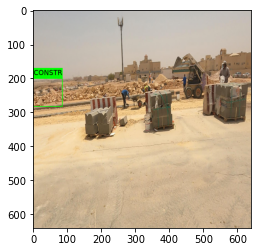

In [ ]:
# image = Chitra(df['image_path'].iloc[a], [df['xmin'].iloc[a],df['ymin'].iloc[a],df['xmax'].iloc[a],df['ymax'].iloc[a]],df['name'].iloc[a])
# # image = Chitra(df['image_path'].iloc[0], [df['xmax'].iloc[0],df['ymax'].iloc[0],df['xmin'].iloc[0],df['ymin'].iloc[0]],df['name'].iloc[0])

# image.resize_image_with_bbox((640, 640))

# print('rescaled bbox:', image.bboxes[0][0][0])
# print('rescaled bbox:', image.bboxes[0][0][1])
# print('rescaled bbox:', image.bboxes[0][1][0])
# print('rescaled bbox:', image.bboxes[0][1][1])
# print('rescaled bbox:', image.bboxes)
# print('rescaled bbox:', image.size[0])
# plt.imshow(image.draw_boxes())

In [ ]:
# df_f.iloc[99]

class                                                 3.0
image_path    images/bb82d717b283276fb7a329ba821e96d3.jpg
name                                              GARBAGE
xmax                                               1132.0
xmin                                                870.0
ymax                                                738.0
ymin                                                560.0
Name: 1740, dtype: object